In [100]:
import numpy as np
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import json
  
# read json data file
f=open('taxi_requests.json')
data = json.load(f)
f.close()

login_times=data['request_time']

# uncomment next line to see how the data looks like
display(login_times) 

['1970-01-01 20:13:18',
 '1970-01-01 20:16:10',
 '1970-01-01 20:16:37',
 '1970-01-01 20:16:36',
 '1970-01-01 20:26:21',
 '1970-01-01 20:21:41',
 '1970-01-01 20:12:16',
 '1970-01-01 20:35:47',
 '1970-01-01 20:35:38',
 '1970-01-01 20:47:52',
 '1970-01-01 20:26:05',
 '1970-01-01 20:31:03',
 '1970-01-01 20:34:46',
 '1970-01-01 20:36:34',
 '1970-01-01 20:39:25',
 '1970-01-01 20:40:37',
 '1970-01-01 20:34:58',
 '1970-01-01 20:43:59',
 '1970-01-01 20:47:46',
 '1970-01-01 20:46:34',
 '1970-01-01 20:56:07',
 '1970-01-01 20:49:12',
 '1970-01-01 20:59:06',
 '1970-01-01 20:59:59',
 '1970-01-01 21:15:01',
 '1970-01-01 21:09:24',
 '1970-01-01 21:19:24',
 '1970-01-01 21:20:53',
 '1970-01-01 21:29:19',
 '1970-01-01 21:58:05',
 '1970-01-01 21:51:51',
 '1970-01-01 21:59:40',
 '1970-01-01 22:08:34',
 '1970-01-01 22:02:51',
 '1970-01-01 21:58:32',
 '1970-01-01 22:02:31',
 '1970-01-01 22:05:32',
 '1970-01-01 22:02:46',
 '1970-01-01 22:10:28',
 '1970-01-01 22:11:58',
 '1970-01-01 22:01:05',
 '1970-01-01 22:

In [3]:
# convert time string to timestamps
# from datetime import datetime
# timestamps=[datetime.strptime(login_times[i], '%Y-%m-%d %H:%M:%S').timestamp() for i in range(len(login_times))]

from datetime import datetime, timezone
timestamps=[datetime.strptime(login_times[i], '%Y-%m-%d %H:%M:%S').replace(tzinfo=timezone.utc).timestamp() for i in range(len(login_times))]

timestamps

[72798.0,
 72970.0,
 72997.0,
 72996.0,
 73581.0,
 73301.0,
 72736.0,
 74147.0,
 74138.0,
 74872.0,
 73565.0,
 73863.0,
 74086.0,
 74194.0,
 74365.0,
 74437.0,
 74098.0,
 74639.0,
 74866.0,
 74794.0,
 75367.0,
 74952.0,
 75546.0,
 75599.0,
 76501.0,
 76164.0,
 76764.0,
 76853.0,
 77359.0,
 79085.0,
 78711.0,
 79180.0,
 79714.0,
 79371.0,
 79112.0,
 79351.0,
 79532.0,
 79366.0,
 79828.0,
 79918.0,
 79265.0,
 80350.0,
 80214.0,
 80252.0,
 79925.0,
 80583.0,
 80534.0,
 80709.0,
 80644.0,
 80399.0,
 81092.0,
 83171.0,
 82556.0,
 83229.0,
 83516.0,
 83075.0,
 83068.0,
 83571.0,
 83285.0,
 83497.0,
 83371.0,
 82675.0,
 83640.0,
 83346.0,
 83251.0,
 83353.0,
 82585.0,
 83395.0,
 83914.0,
 83362.0,
 84090.0,
 83265.0,
 84205.0,
 83771.0,
 84125.0,
 83868.0,
 84253.0,
 84352.0,
 84816.0,
 84660.0,
 84043.0,
 84371.0,
 84066.0,
 84419.0,
 84637.0,
 85104.0,
 85085.0,
 84834.0,
 84632.0,
 85541.0,
 85405.0,
 85044.0,
 84901.0,
 85402.0,
 85977.0,
 85656.0,
 85500.0,
 84432.0,
 85534.0,
 85487.0,


# Written questions

Please search online and read the documentation for strptime() and timestamp() and write down short answers to the following questions:

### A
- What does the previous cell do? 
It uses strptime to get timestamps.

### B
- What does the concept of "timestamp" mean? 
A timestamp is the current time of an event that a computer records. Timestamp is the pandas equivalent of python's Datetime and is interchangeable with it in most cases.
- What are its type and unit? 
Time instants, say 16:23:32.234, are represented counting hours, minutes, seconds and fractions from midnight: i.e. 00:00:00.000 is midnight, 12:00:00.000 is noon, etc. Each calendar day has exactly 86400 seconds. This is a “naive” time, with no explicit notion of timezones or specific time scales (UT1, UTC, TAI, etc.). 

### C
- Is the variable "timestamps" a list or a numpy array? 
It is numpy.ndarray

### D
- Which day of week (Sunday, Monday, ...) is 1970-01-01? 
Thursday

### E
- Which function can convert a timestamp back to datetime? 
The fromtimestamp function from the datetime module. This function takes the timestamp as input and returns the datetime object corresponding to the timestamp. 


# Project questions

Explore data, write code, and search online to answer the following questions about the data:

1- How many days are there in the data?

2- Which date was the busiest date (the day with the most requests)? Which date was the second busiest date?

3- Which hour was the busiest hour (the hour with the most requests)?

4- Are there any two requests that happened at the same time?

5- What is the longest gap between two consequent requests?

6- Overall, does the volume of requests increase or decrease over time?

7- Bonus: For each day calculate the average request time for all requests between 6:00 AM and 9:00 AM

8- Bonus: Which day of week is the busiest?

9- Bonus: Calculate the average number of requests for each of the 7*24 hours of the week.

10- Bonus: Which dates other than the standard weekend days were holidays?

# 1

In [4]:
day_number = np.array(timestamps).astype(int)//(24*60*60)
print("There are", max(day_number)+1, "days in the data.")

There are 103 days in the data.


# 2

In [272]:
unique, counts = np.unique(day_number, return_counts=True)
#print(unique, "\n\n", counts)

In [6]:
maxday = np.argmax(counts) # find the day with the maximum requests

sublist = [x for x in counts if x < max(counts)]
second_max = np.argmax(sublist)

print("The busiest day is day number", unique[maxday])
print("The second busiest day is day number", unique[second_max])

The busiest day is day number 93
The second busiest day is day number 72


# 3

In [7]:
hour_number = np.array(timestamps).astype(int)//(60*60)

unique_h, counts_h = np.unique(hour_number, return_counts=True)
maxhour = np.argmax(counts_h) # find the hour with the maximum requests

print("The busiest hour is hour number", unique_h[maxhour])

The busiest hour is hour number 2233


# 4

In [66]:
timestamps_1 = np.copy(timestamps)

import collections
dups = [item for item, count in collections.Counter(timestamps_1).items() if count > 1]
print("There are", len(dups), "requests that happened at the same time.")

There are 868 requests that happened at the same time.


# 5

In [101]:
minute_number = np.array(timestamps).astype(int)//(60)
difference_sub = max(np.abs(np.diff(minute_number)))

print("Longest gap between two consequent requests number is", difference_sub, "minutes.")

Longest gap between two consequent requests number is 100 minutes.


# 6

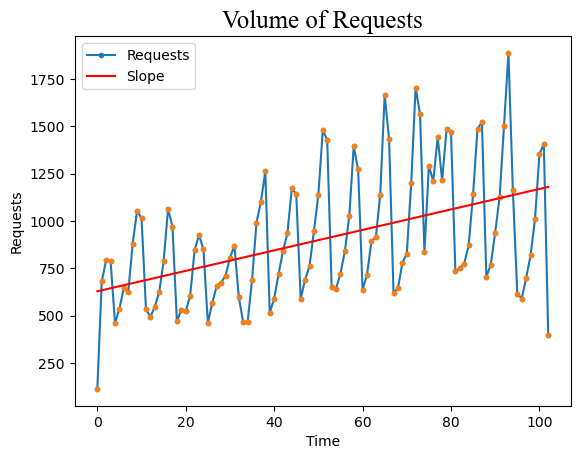

In [98]:
plt.plot(counts, marker='.',label='Requests')

fit = np.polyfit(unique,counts,1,cov=True)
best_fit_y = fit[0][0]*unique + fit[0][1] 
plt.plot(unique,counts,'.')
plt.plot(unique,best_fit_y, label='Slope', color='red');

plt.xlabel("Time")
plt.ylabel("Requests")
plt.title("Volume of Requests", fontdict={'fontname': 'Times New Roman', 'fontsize': 18})
plt.legend()
plt.show()

# 7

In [183]:
timestamps = np.sort(timestamps)
years = np.array([datetime.utcfromtimestamp(ts).year for ts in timestamps])
months = np.array([datetime.utcfromtimestamp(ts).month for ts in timestamps])
days = np.array([datetime.utcfromtimestamp(ts).day for ts in timestamps])
hours = np.array([datetime.utcfromtimestamp(ts).hour for ts in timestamps])
minutes = np.array([datetime.utcfromtimestamp(ts).minute for ts in timestamps])
seconds = np.array([datetime.utcfromtimestamp(ts).second for ts in timestamps])
weekdays = np.array([datetime.utcfromtimestamp(ts).strftime('%A') for ts in timestamps])
weekdays_number = np.array([datetime.utcfromtimestamp(ts).strftime('%w') for ts in timestamps])
weekdays_number = [int(i) for i in weekdays_number]

In [278]:
req_id = np.arange(0, len(timestamps))
req_matrix = np.zeros((len(req_id), 1, 12, 8, 24))
req_matrix[req_id, years-1970, months, weekdays_number, hours]=1
six_to_nine = req_matrix[:,:,:,:,6:9]
result = six_to_nine.sum(axis=4).sum(axis=0)
result

array([[[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [176.,  69.,  52.,  68.,  63., 100., 169.,   0.],
        [163., 100.,  51.,  65.,  56.,  91., 157.,   0.],
        [297., 105.,  83.,  60.,  78.,  98., 202.,   0.],
        [ 91.,  50.,  12.,  38.,  46.,  46., 185.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]])

In [264]:
df = pd.read_json('taxi_requests.json')

df2 = df.join(pd.DataFrame(hours))
df2.rename(columns={df2.columns[1]: "hours" }, inplace = True)

df2

,request_time,hours
0,1970-01-01 20:13:18,20
1,1970-01-01 20:16:10,20
2,1970-01-01 20:16:37,20
3,1970-01-01 20:16:36,20
4,1970-01-01 20:26:21,20
...,...,...
93137,1970-04-13 18:50:19,18
93138,1970-04-13 18:43:56,18
93139,1970-04-13 18:54:02,18
93140,1970-04-13 18:57:38,18


In [265]:
df2["hours"].value_counts()

22    6607
1     6317
23    6058
0     5993
2     5800
11    5799
21    5623
4     5034
12    4964
3     4831
20    4103
13    3611
14    3426
19    3235
10    3064
15    3038
18    2980
5     2945
16    2832
17    2584
9     1527
6     1138
8      818
7      815
Name: hours, dtype: int64

# 8

In [267]:
df2['day_of_week'] = df['request_time'].dt.day_name()
df2

,request_time,hours,day_of_week
0,1970-01-01 20:13:18,20,Thursday
1,1970-01-01 20:16:10,20,Thursday
2,1970-01-01 20:16:37,20,Thursday
3,1970-01-01 20:16:36,20,Thursday
4,1970-01-01 20:26:21,20,Thursday
...,...,...,...
93137,1970-04-13 18:50:19,18,Monday
93138,1970-04-13 18:43:56,18,Monday
93139,1970-04-13 18:54:02,18,Monday
93140,1970-04-13 18:57:38,18,Monday


In [192]:
req_day = df2["day_of_week"].value_counts()
req_day

Saturday     19377
Sunday       18167
Friday       15208
Thursday     11960
Wednesday    10339
Tuesday       9268
Monday        8823
Name: day_of_week, dtype: int64

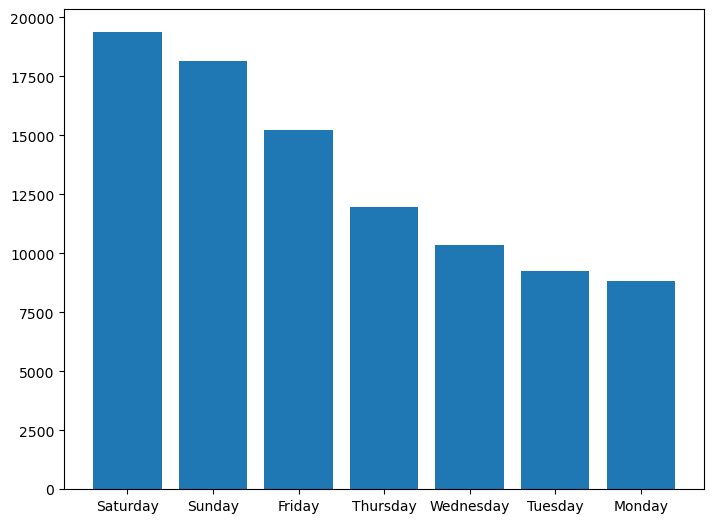

In [193]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
days_ = ['Saturday', 'Sunday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']
reqs = req_day[0:7]
ax.bar(days_,reqs)
plt.show()

# 9

In [238]:
req_id = np.arange(0, len(timestamps))

req_matrix = np.zeros((len(req_id), 1, 12, 8, 24))
req_matrix[req_id, years-1970, months, weekdays_number, hours]=1
six_to_nine = req_matrix[:,:,:,:,6:9]
result = req_matrix.sum(axis=0).sum(axis=0).sum(axis=0) /(1*7)
result.shape

(8, 24)

In [270]:
df2.groupby(['day_of_week', 'hours']).agg(['count'])

request_time
                         count
day_of_week hours             
Friday      0              983
            1              957
            2              771
            3              502
            4              353
...                        ...
Wednesday   19             306
            20             500
            21             739
            22             885
            23             894

[168 rows x 1 columns]

# 10

In [194]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

cal = calendar()
holidays = cal.holidays(start=df2['request_time'].min(), end=df2['request_time'].max())

df2['holiday'] = df2['request_time'].isin(holidays)
df2

,request_time,hours,day_of_week,holiday
0,1970-01-01 20:13:18,20,Thursday,False
1,1970-01-01 20:16:10,20,Thursday,False
2,1970-01-01 20:16:37,20,Thursday,False
3,1970-01-01 20:16:36,20,Thursday,False
4,1970-01-01 20:26:21,20,Thursday,False
...,...,...,...,...
93137,1970-04-13 18:50:19,18,Monday,False
93138,1970-04-13 18:43:56,18,Monday,False
93139,1970-04-13 18:54:02,18,Monday,False
93140,1970-04-13 18:57:38,18,Monday,False


In [196]:
df2['holiday'].value_counts()

False    93142
Name: holiday, dtype: int64